In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
def plot_2d_dataset(data, colors):
    pyplot.figure(figsize(8, 8))
    pyplot.scatter(list(map(lambda x: x[0], data[0])), list(map(lambda x: x[1], data[0])), c = data[1], cmap = colors)

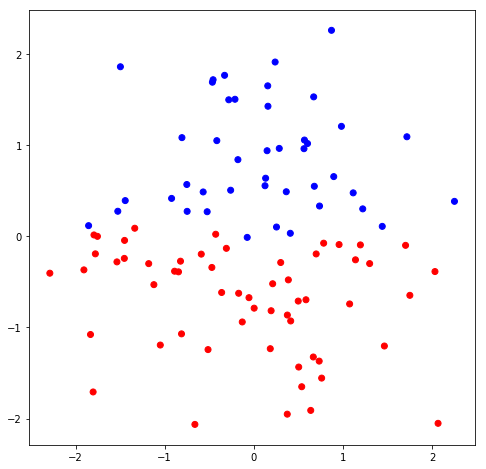

In [5]:
#генерация датаседа для регрессии
reg_data, reg_target = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                                noise = 5., random_state = 7)

plot_2d_dataset([reg_data, reg_target], ListedColormap(['red', 'blue']))

In [7]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(reg_data, reg_target, 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

In [8]:
#Линейная регрессия (минимум среднеквадратичной ошибки)
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [9]:
#Линейная регрессия (минимум асолютной ошибки) -- отсеивает признаки, некритично реагирует на выбросы
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [11]:
#Линейная регрессия (минимум асолютной ошибки) со встроенной кросс-валидацией
alphas = np.arange(1, 100, 5)# вектор коэффициентов регуляризации
lasso_cv_regressor = linear_model.LassoCV(alphas=alphas, cv=3)# кросс-валидация с 3 фолдами
lasso_cv_regressor.fit(train_data, train_labels)

alphas_p = lasso_cv_regressor.alphas_ #лучше брать вектор коэффициентов из модели, он может измениться
mse_p = lasso_cv_regressor.mse_path_.mean(axis=1) #среднеквадратичная ошибка

In [13]:
#Регрессия стохастический градиентный спуск
sgd_regressor = linear_model.SGDRegressor(random_state = 0)
sgd_regressor.fit(train_data, train_labels)
predictions = sgd_regressor.predict(test_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
